In [3]:
!pip install pymupdf


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


In [5]:
df = pd.read_csv(
    'Thesis-Final_June 21, 2025_13.51.csv',
    header=1
)


In [26]:

freq_col  = 'How often do you perform Google searches?'
trust_col = (
    'Please indicate how much you agree or disagree with the following '
    'statements about your use of Google and private browsing modes. - '
    'I trust that Google presents search results that contain truthful and '
    'accurate information'
)
perso_col = (
    'Please indicate how much you agree or disagree with the following '
    'statements about your use of Google and private browsing modes. - '
    'I often notice that the search results I receive reflect my personal '
    'interests or previous online behavior'
)

bubble_col = (
    "Are you aware of the 'filter bubble' effect, where online platforms like Google and social "
    "media tailor the information you see based on your past behavior ,potentially limiting exposure "
    "to diverse perspectives and alternative viewpoints?"
)

incog_col = 'How often do you use Incognito/Private mode for searching?'


freq_map = {
    '1': 'Multiple times a day',
    '2': 'Once or twice a day',
    '3': 'Few times a week'
}

likert_map = {
    1: 'Strongly disagree',
    2: 'Somewhat disagree',
    3: 'Neither agree nor disagree',
    4: 'Somewhat agree',
    5: 'Strongly agree'
}

bubble_map = {
    1: 'Aware',
    2: 'Unsure',
    3: 'Unaware'
}

incog_map = {
    1: 'Never',
    2: 'Rarely',
    3: 'Sometimes',
    4: 'Often',
    5: 'Always'
}

df['freq_label'] = df[freq_col].astype(str).map(freq_map)

freq_counts = df['freq_label'].value_counts().reindex(freq_map.values(), fill_value=0)
freq_percs  = freq_counts / freq_counts.sum() * 100


trust_raw = pd.to_numeric(df[trust_col], errors='coerce').dropna().astype(int)
perso_raw = pd.to_numeric(df[perso_col], errors='coerce').dropna().astype(int)

trust_perc = (
    trust_raw.map(likert_map)
    .value_counts(normalize=True)
    .reindex(likert_map.values(), fill_value=0) * 100
)
perso_perc = (
    perso_raw.map(likert_map)
    .value_counts(normalize=True)
    .reindex(likert_map.values(), fill_value=0) * 100
)

df['bubble_label'] = (
    pd.to_numeric(df[bubble_col], errors='coerce')
      .dropna()
      .astype(int)
      .map(bubble_map)
)

bubble_counts = df['bubble_label'].value_counts().reindex(bubble_map.values(), fill_value=0)
bubble_percs  = (bubble_counts / bubble_counts.sum() * 100).round(1)


df['incog_label'] = (
    pd.to_numeric(df[incog_col], errors='coerce')
      .dropna()
      .astype(int)
      .map(incog_map)
)

# 5) Compute counts and percentages
incog_counts = df['incog_label'].value_counts().reindex(incog_map.values(), fill_value=0)
incog_percs  = (incog_counts / incog_counts.sum() * 100).round(1)



             Count  Percentage
incog_label                   
Never            3         3.8
Rarely          25        31.2
Sometimes       30        37.5
Often           22        27.5
Always           0         0.0


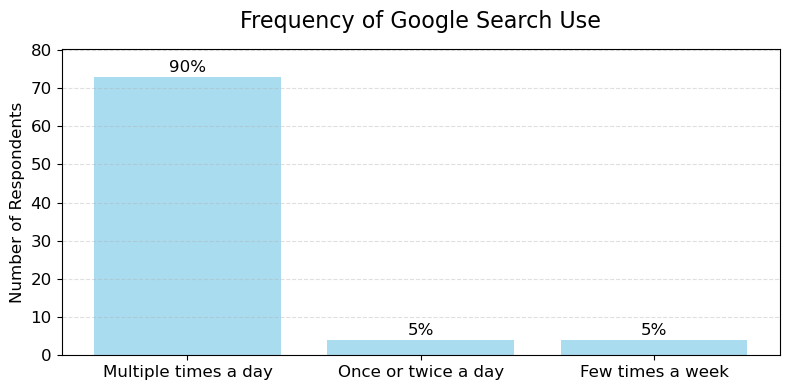

In [78]:
plt.figure(figsize=(8,4))
bars = plt.bar(
    freq_counts.index,
    freq_counts.values,
    color='skyblue',
    alpha=0.7
)
for bar, pct in zip(bars, freq_percs):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        f"{pct:.0f}%",
        ha='center', va='bottom', fontsize=12
    )
plt.title('Frequency of Google Search Use', fontsize=16, pad=15)
plt.ylabel('Number of Respondents', fontsize=12)
plt.ylim(0, freq_counts.max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


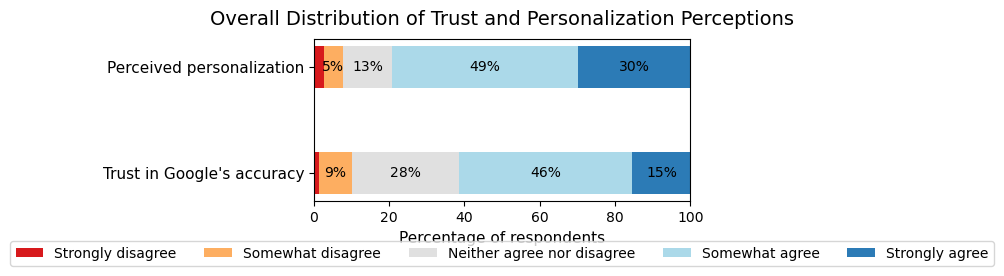

In [80]:
colors = {
    'Strongly disagree':      '#d7191c',
    'Somewhat disagree':      '#fdae61',
    'Neither agree nor disagree': '#e0e0e0',
    'Somewhat agree':         '#abd9e9',
    'Strongly agree':         '#2c7bb6'
}
fig, ax = plt.subplots(figsize=(8,3))
lt, lp = 0, 0
for label in likert_map.values():
    tv, pv = trust_perc[label], perso_perc[label]
    ax.barh(0, tv, left=lt, height=0.4, color=colors[label])
    if tv>=5: ax.text(lt+tv/2, 0, f"{tv:.0f}%", va='center', ha='center', fontsize=10)
    lt += tv
    ax.barh(1, pv, left=lp, height=0.4, color=colors[label])
    if pv>=5: ax.text(lp+pv/2, 1, f"{pv:.0f}%", va='center', ha='center', fontsize=10)
    lp += pv

ax.set_yticks([0,1])
ax.set_yticklabels(["Trust in Google's accuracy", "Perceived personalization"], fontsize=11)
ax.set_xlim(0,100)
ax.set_xlabel('Percentage of respondents', fontsize=11)
ax.set_title('Overall Distribution of Trust and Personalization Perceptions', fontsize=14, pad=10)
handles = [Patch(facecolor=colors[l], label=l) for l in likert_map.values()]
ax.legend(handles=handles, ncol=5, loc='upper center', bbox_to_anchor=(0.5,-0.2), fontsize=10)
plt.tight_layout()
plt.show()

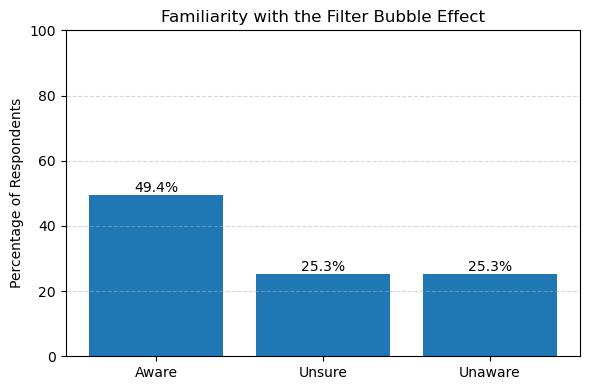

In [24]:
bubble_counts = df['bubble_label'].value_counts().reindex(bubble_map.values(), fill_value=0)
bubble_percs  = (bubble_counts / bubble_counts.sum() * 100).round(1)

plt.figure(figsize=(6, 4))
bars = plt.bar(bubble_percs.index, bubble_percs.values)

for bar, perc in zip(bars, bubble_percs.values):
    plt.text(bar.get_x() + bar.get_width() / 2, perc + 1, f"{perc}%", ha='center')

plt.title('Familiarity with the Filter Bubble Effect')
plt.ylabel('Percentage of Respondents')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

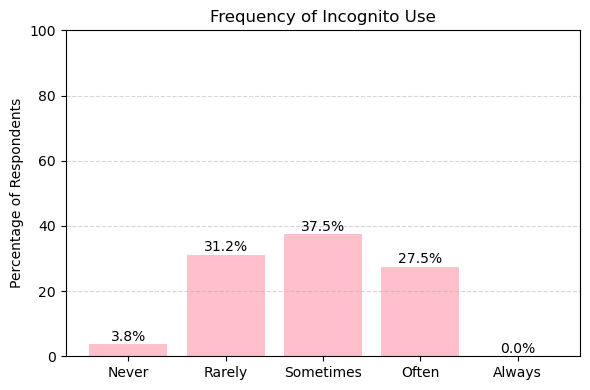

In [32]:
plt.figure(figsize=(6, 4))
bars = plt.bar(incog_percs.index, incog_percs.values, color='pink')

for bar, perc in zip(bars, incog_percs.values):
    plt.text(bar.get_x() + bar.get_width()/2, perc + 1, f"{perc}%", ha='center')

plt.title('Frequency of Incognito Use')
plt.ylabel('Percentage of Respondents')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [34]:
incog_summary = pd.DataFrame({
    'Count': incog_counts,
    'Percentage': incog_percs
})
print(incog_summary)

             Count  Percentage
incog_label                   
Never            3         3.8
Rarely          25        31.2
Sometimes       30        37.5
Often           22        27.5
Always           0         0.0
